<a href="https://colab.research.google.com/github/kareembadrsaber/electropi.ai_projects/blob/master/NLP_Twitter_Disaster_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from imblearn.over_sampling import SMOTE
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_train = pd.read_csv('/content/sample_data/train.csv')
df_test = pd.read_csv('/content/sample_data/test.csv')
df_target = pd.read_csv('/content/sample_data/sample_submission.csv')

In [6]:
df_target.isna().sum()

id        0
target    0
dtype: int64

In [7]:
df_train.dropna(axis=0, inplace=True)
df_test.dropna(axis=0, inplace=True)

In [8]:
df_test['text'] = df_test['keyword'] + " "+df_test['location'] + " "+df_test['text']
df_train['text'] = df_train['keyword'] + " "+df_train['location'] + " "+df_train['text']

In [9]:
df_test = pd.merge(df_test, df_target, on='id')
df = pd.concat([df_train, df_test], axis=0)

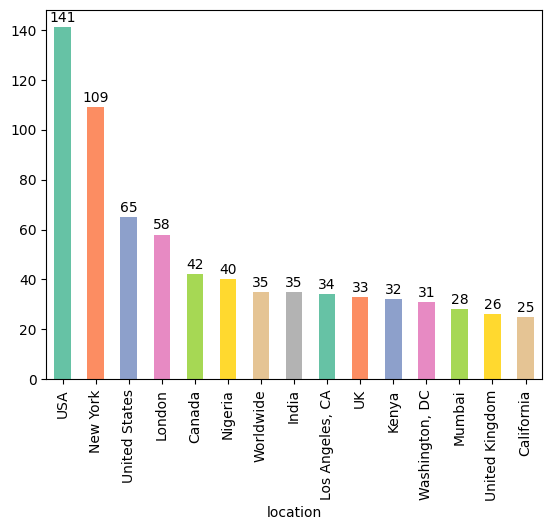

In [10]:
colors = sns.color_palette('Set2')
ax = df['location'].value_counts()[:15].plot(kind='bar', color=colors)
for i, v in enumerate(df['location'].value_counts()[:15]):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')
plt.show()

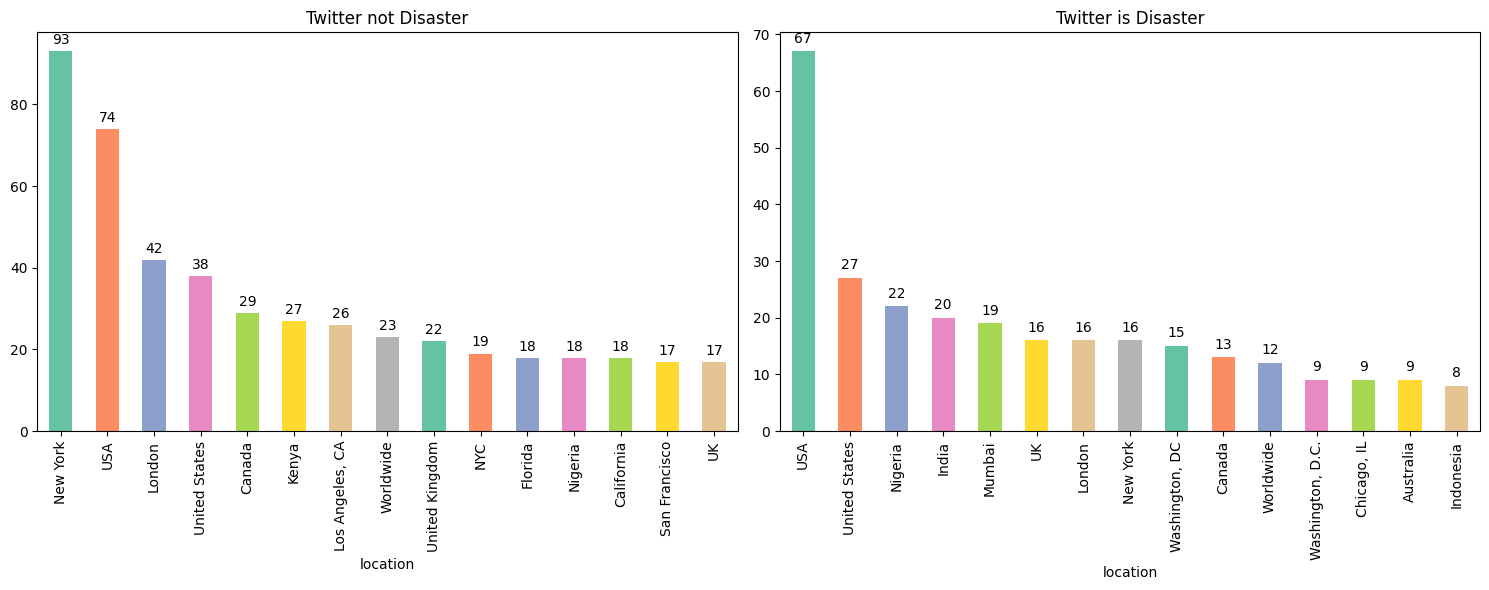

In [11]:
plt.figure(figsize=(15, 6))

# Define colors
colors = sns.color_palette('Set2')

# Plot the first subplot
plt.subplot(1, 2, 1)
plt.title("Twitter not Disaster")
ax1 = df[df['target'] == 0]['location'].value_counts()[:15].plot(kind='bar', color=colors)
for i, v in enumerate(df[df['target'] == 0]['location'].value_counts()[:15]):
    ax1.text(i, v + 1, str(v), ha='center', va='bottom')

# Plot the second subplot
plt.subplot(1, 2, 2)
plt.title("Twitter is Disaster")
ax2 = df[df['target'] == 1]['location'].value_counts()[:15].plot(kind='bar', color=colors)
for i, v in enumerate(df[df['target'] == 1]['location'].value_counts()[:15]):
    ax2.text(i, v + 1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### **Clean Tweets**


In [12]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
X = df['text'].values
y = df['target'].values

In [14]:
def cleanTweet():
    corpus=[]
    stop_words = stopwords.words("english")
    stop_words.remove("not")
    pos = PorterStemmer()
    lem = WordNetLemmatizer()
    for i in range(0, len(X)):
        tweet = re.sub('[^a-zA-Z0-9]', " ", X[i])
        tweet = tweet.lower()
        wordsInTweet = nltk.word_tokenize(tweet)
        tweet = [lem.lemmatize(word) for word in nltk.word_tokenize(tweet) if word not in stop_words]
        tweet = " ".join(tweet)
        corpus.append(tweet)
    return corpus

In [15]:
X = cleanTweet()
y = df['target'].values

### TF-IDF
# TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used in information retrieval and text mining to measure the importance of a term in a document relative to a collection of documents.


In [16]:
tf_vectorizer = TfidfVectorizer()
X = tf_vectorizer.fit_transform(X).toarray()
columns = tf_vectorizer.get_feature_names_out()
df_final = pd.DataFrame(data=X, columns=columns)
df_final.shape

(7238, 22021)

## **ANOVA Feature Selection**
# ANOVA (Analysis of Variance) is a statistical method used to analyze differences among group means.






In [17]:
selector = SelectKBest(f_classif, k=1000)
X_new = selector.fit_transform(X, y)

### **SMOTE for imbalance dataset**

# SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address class imbalance in a dataset by generating synthetic examples of the minority class. It works by interpolating new instances along the line segments connecting similar instances of the minority class, thereby creating a more balanced dataset for training machine learning models.



In [18]:
X, y = SMOTE().fit_resample(X, y)

### **Build Model**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


### **Logistic Regression**
# Logistic Regression is a type of regression analysis used for predicting the probability of a binary outcome based on one or more predictor variables. It models the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function, which restricts the predicted values to the range [0, 1]. It's commonly used for binary classification tasks and is particularly useful when the relationship between the features and the target variable is not linear.


In [26]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
y_pred_lg= model_log.predict(X_test)
model_log_accurcy = accuracy_score(y_test, y_pred_lg)

In [27]:
model_log_accuracy

0.7997025285076846


### **Naive Bayes**
# Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem with the "naive" assumption of independence between features. It's widely used for text classification tasks, such as spam detection and sentiment analysis, but can also be applied to other types of data. Naive Bayes calculates the probability of each class given a set of input features and selects the class with the highest probability as the prediction. Despite its simplicity and the "naive" assumption, Naive Bayes often performs well in practice, especially with high-dimensional data and when the independence assumption holds approximately true.


In [28]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
model_nb_accurcy = accuracy_score(y_test, y_pred_nb)

In [29]:
model_nb_accuracy

0.7659890927119485

### **K-Nearest Neighbors**
# K-Nearest Neighbors (KNN) is a simple and intuitive algorithm used for both classification and regression tasks. In KNN, the prediction for a new data point is based on the majority class (for classification) or the average value (for regression) of its 'k' nearest neighbors in the training data. The value of 'k' is a hyperparameter that needs to be chosen carefully, as it determines the level of smoothness in the decision boundary. KNN is non-parametric, meaning it doesn't make any assumptions about the underlying data distribution, and it's also instance-based, which means it doesn't learn a model during training. Instead, it stores all the training data and uses it to make predictions directly during inference.


In [24]:
# Define a pipeline with preprocessing steps and the KNeighborsClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5, p=2))
])
# Train the model using the pipeline
pipeline.fit(X_train, y_train)
y_pred_knn = pipeline.predict(X_test)
model_neighbor_accuracy = accuracy_score(y_test, y_pred_knn)


In [25]:
model_neighbor_accuracy

0.7456618740704016

### **DecisionTree**
# Decision Trees are a popular and widely used supervised learning algorithm for both classification and regression tasks. They work by recursively partitioning the input space into regions, based on the feature values, in order to minimize impurity or maximize information gain at each split. Each internal node of the tree represents a decision based on a feature, while each leaf node represents a class label (in classification) or a predicted value (in regression). Decision Trees are interpretable and can handle both numerical and categorical data, making them versatile and easy to understand. However, they are prone to overfitting, especially when the tree depth is not properly controlled.


In [30]:
model_DecisionTree = DecisionTreeClassifier(criterion='entropy',max_depth=6)
model_DecisionTree.fit(X_train, y_train)
y_pred_dt = model_DecisionTree.predict(X_test)
model_DecisionTree_accurcy = accuracy_score(y_test, y_pred_dt)


In [31]:
model_DecisionTree_accuracy

0.6509667823500248

### **Random Forest**
#Random Forest: A versatile and powerful ensemble learning method that combines the predictive power of multiple decision trees to deliver reliable and accurate results.

In [32]:
model_RandomForest = RandomForestClassifier()
model_RandomForest.fit(X_train, y_train)
y_pred_rf = model_RandomForest.predict(X_test)
model_RandomForest_accurcy = accuracy_score(y_test, y_pred_rf)

In [34]:
model_RandomForest_accuracy


0.8433316807139316

### **SVM (Support Vector Machine)**:
#A supervised learning algorithm that is effective for both classification and regression tasks. It finds the optimal hyperplane that best separates data points into different classes in a high-dimensional space, maximizing the margin between classes.

In [21]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Use a smaller dataset (e.g., 10% of the original dataset)
X_train_small = X_train_scaled[:int(0.1 * len(X_train_scaled))]
y_train_small = y_train[:int(0.1 * len(y_train))]
model_svm = SVC(kernel="rbf")
model_svm.fit(X_train_small, y_train_small)
y_pred_svm = model_svm.predict(X_test_scaled)
model_svm_accuracy = accuracy_score(y_test, y_pred_svm)


In [23]:
model_svm_accuracy

0.4407535944471988

### **XGBoost (Extreme Gradient Boosting):**
#A powerful implementation of gradient boosting algorithms, known for its efficiency, speed, and accuracy in handling structured data. It sequentially builds a series of decision trees, optimizing the model's performance by minimizing the overall loss function.

In [35]:
model_xgboost = xgb.XGBClassifier(max_depth=10)
model_xgboost.fit(X_train, y_train)
y_pred_xgb = model_xgboost.predict(X_test)
model_xgboost_accuracy= accuracy_score(y_test, y_pred_xgb)

In [37]:
df_model = pd.DataFrame({
    'model':['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 'DecisionTree','Random Forest', 'SVM', 'XG boost'],
    'accuracy':[model_log_accurcy, model_nb_accuracy, model_neighbor_accuracy, model_DecisionTree_accuracy, model_RandomForest_accuracy, model_svm_accuracy, model_xgboost_accuracy]
})
df_model = df_model.sort_values('accuracy')
df_model

,model,accuracy
5,SVM,0.440754
3,DecisionTree,0.650967
2,K-Nearest Neighbors,0.745662
1,Naive Bayes,0.765989
0,Logistic Regression,0.799703
6,XG boost,0.799703
4,Random Forest,0.843332


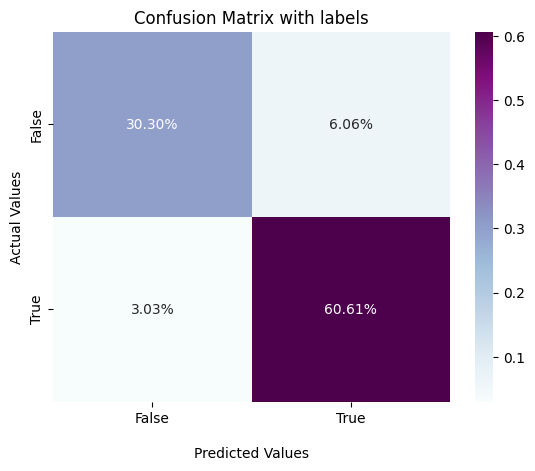

In [46]:
cf_matrix = np.array([[100, 20],
                      [10, 200]])
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap="BuPu")
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

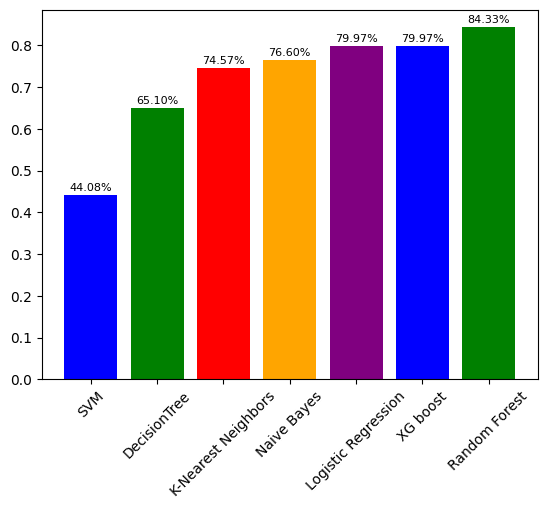

In [50]:
colors = ['blue', 'green', 'red', 'orange', 'purple']
plt.bar(df_model['model'], df_model['accuracy'], color=colors)
plt.xticks(rotation=45)
for i, value in enumerate(df_model['accuracy']):
    plt.text(i, value + 0.01, f"{value*100:.2f}%", ha='center', fontsize=8)

plt.show()

### **the summary**

**1-Random Forest** achieved the highest accuracy of 84.33%, making it the top-performing model in terms of overall accuracy

**2-Logistic Regression and XG Boost** both attained an accuracy of approximately 79.97%, indicating their comparable performance.

**3-Naive Bayes** demonstrated an accuracy of 76.60%, which suggests moderate performance.

**4-K-Nearest Neighbors** achieved an accuracy of 74.57%, indicating a lower performance compared to the above models.

**5-Decision Tree** exhibited an accuracy of 65.10%, which implies that it may not be the most suitable model for this dataset.

**6-SVM** recorded the lowest accuracy of 44.08%, indicating poor performance on this dataset.



### **recommendtion**

**Based on these results, it is recommended to prioritize the Random Forest model due to its highest accuracy. However, it is also advisable to further evaluate and fine-tune the Logistic Regression and XG Boost models, as they demonstrated competitive accuracy scores. Further analysis and experimentation may be required to determine the most suitable model for the specific requirements of the task at hand.**